In [1]:
from IPython.display import display

from sympy import *
init_printing()

In [2]:
a, b, g = symbols('alpha, beta, gamma', real=True)
eps, t, x, y = symbols('varepsilon, t, x, y', real=True)
U = symbols('U', cls=Function)(eps, t, x, y)

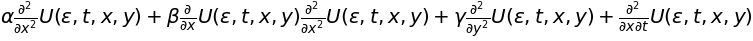

In [3]:
eq1 = U.diff(t, x) + a*U.diff(x, 2) + b*U.diff(x)*U.diff(x, 2) + g*U.diff(y, 2)
eq1

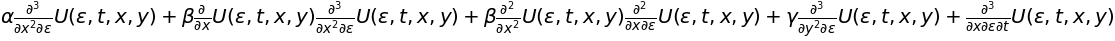

In [4]:
eq1.diff(eps)

In [5]:
u, ut, ux, uy = symbols('U, Ut, Ux, Uy', real=True)
f = symbols('f', cls=Function)(t, x, y, u, ut, ux, uy)
def Dt(a):
    return a.diff(t) + a.diff(u)*ut + a.diff(ut)*U.diff(t, t)\
         + a.diff(ux)*U.diff(t, x) + a.diff(uy)*U.diff(t, y)
def Dx(a):
    return a.diff(x) + a.diff(u)*ux + a.diff(ut)*U.diff(t, x)\
         + a.diff(ux)*U.diff(x, x) + a.diff(uy)*U.diff(y, x)
def Dy(a):
    return a.diff(y) + a.diff(u)*uy + a.diff(ut)*U.diff(t, y)\
         + a.diff(ux)*U.diff(x, y) + a.diff(uy)*U.diff(y, y)

In [6]:
toD = {
    t: Dt,\
    x: Dx,\
    y: Dy,\
}
def totalD(a):
    if not a.args:
        return a
    else:
        if a.func != Derivative:
            return a.func(*(totalD(s) for s in a.args))
        elif (eps, 1) not in a.args:
            return a
        else:
            assert a.args[0] == U
            r = f
            for v, l in a.args[1:]:
                if v != eps:
                    for i in range(l):
                        r = toD[v](r)
            return r
eq2 = totalD(eq1.diff(eps)).expand()     

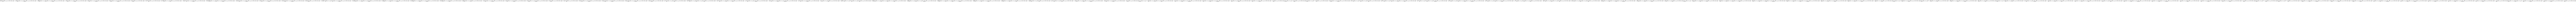

In [7]:
s = solve(eq1, U.diff(t, x))[0]
def sub_eq(a):
    if not a.args:
        return a
    else:
        if a.func != Derivative:
            return a.func(*(sub_eq(s) for s in a.args))
        elif a.args[0] != U or a.args[1][0] != t\
                or len(a.args) < 3 or a.args[2][0] != x:
            return a
        else:
            r = s
            for v, l in a.args[1:]:
                if v in (t, x):
                    l -= 1
                r = r.diff(v, l)
            return r
eq3 = sub_eq(eq2).expand()
eq3

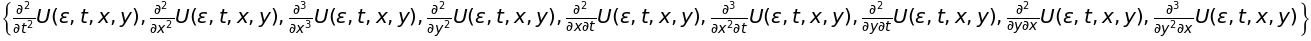

In [8]:
toU = {
    U.diff(t): ut,\
    U.diff(x): ux,\
    U.diff(y): uy,\
}
DF = set()
def lstD(a):
    if not a.args:
        return a
    else:
        if a.func != Derivative:
            return a.func(*(lstD(s) for s in a.args))
        elif a.args[0] != U:
            return a
        elif a in toU:
            return toU[a]
        else:
            DF.add(a)
            return a
eq4 = lstD(eq3).expand()
DF

In [9]:
for df in DF:
    deg = eq4.as_poly(df).degree()
    print(deg, df)

1 Derivative(U(varepsilon, t, x, y), (x, 3))
2 Derivative(U(varepsilon, t, x, y), x, y)
2 Derivative(U(varepsilon, t, x, y), t, y)
2 Derivative(U(varepsilon, t, x, y), (x, 2))
1 Derivative(U(varepsilon, t, x, y), x, (y, 2))
2 Derivative(U(varepsilon, t, x, y), (y, 2))
1 Derivative(U(varepsilon, t, x, y), (t, 2))
1 Derivative(U(varepsilon, t, x, y), t, (x, 2))
1 Derivative(U(varepsilon, t, x, y), t, x)


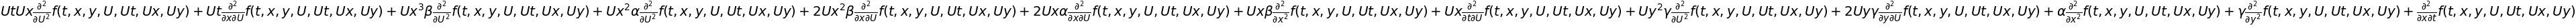

--------------------


--------------------


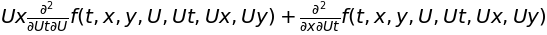

--------------------


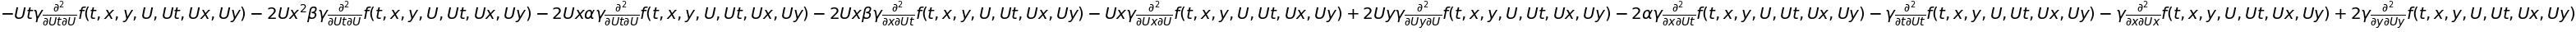

--------------------


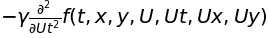

--------------------


--------------------


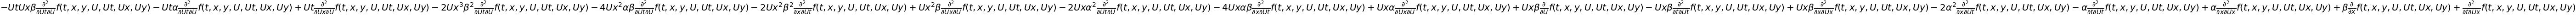

--------------------


--------------------


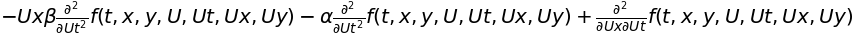

--------------------


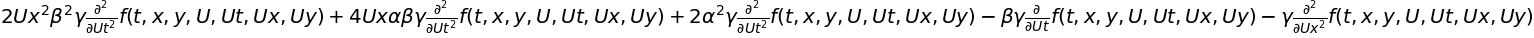

--------------------


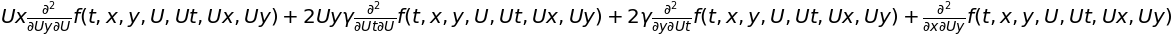

--------------------


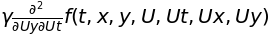

--------------------


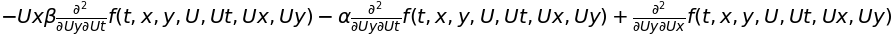

--------------------


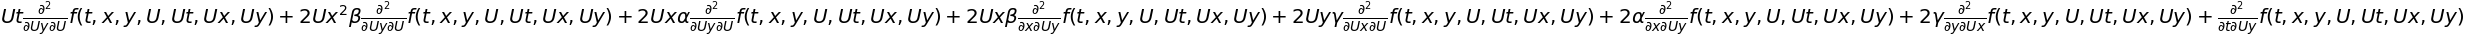

--------------------


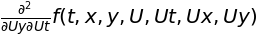

--------------------


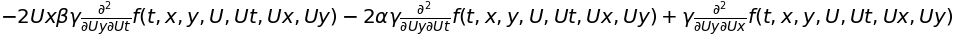

--------------------


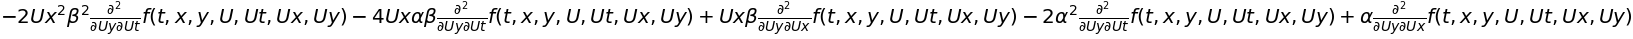

--------------------


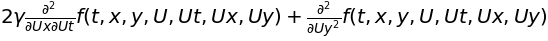

--------------------


--------------------


In [11]:
eqs = [eq4]
for df in DF:
    r = []
    for eq in eqs:
        for d in range(2):
            if eq.coeff(df, d):
                r.append(eq.coeff(df, d))
    eqs = r
for eq in eqs:
    display(eq)
    print("-"*20)